# Model Evaluation and Comparison

This notebook compares the performance of two models on both test and external validation datasets.

## Data Loading and Preprocessing

We start by importing necessary libraries and defining a function to calculate various performance metrics.

In [10]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
# Define a function to calculate performance metrics
def calculate_performance(y_true, y_pred, y_pred_prob):
    
    # Calculate metrics
    auc = roc_auc_score(y_true, y_pred_prob)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    ppv = precision_score(y_true, y_pred)  # PPV is the same as precision
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = recall_score(y_true, y_pred, pos_label=0)  # Specificity is recall of the negative class
    
    return {'Accuracy':accuracy, 'TPR':sensitivity, 'TNR':specificity, 'PPV':ppv, 'F1':f1, 'AUC':auc}

## Test Set Evaluation

We load the test set results for both models and visualize their confusion matrices.

In [12]:
# Load test set results for both models
results_model1_test = pd.read_csv('./results/Model1_TestSet.csv')
results_model2_test = pd.read_csv('./results/Model2_TestSet.csv')

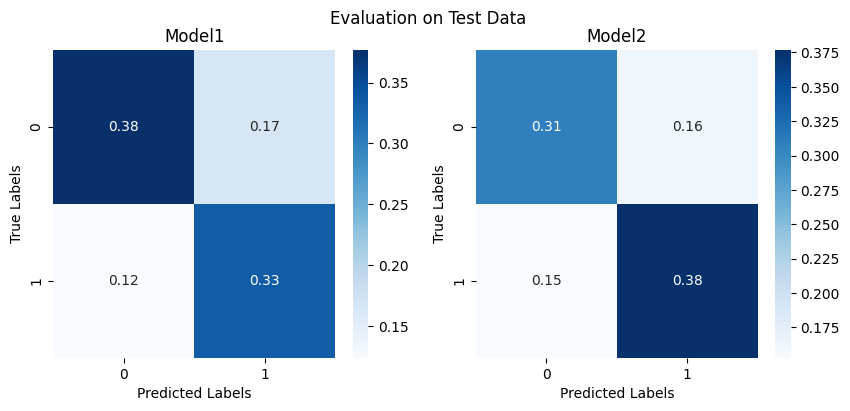

In [13]:
# Visualization of confusion matrices for test set results

# Extract true labels, predictions, and probabilities for both models
y_true_m1_test = results_model1_test.Label
y_pred_m1_test = results_model1_test.Prediction
y_prob_m1_test = results_model1_test.Probability

y_true_m2_test = results_model2_test.Label
y_pred_m2_test = results_model2_test.Prediction
y_prob_m2_test = results_model2_test.Probability

# Compute the confusion matrices
cm1 = confusion_matrix(y_true_m1_test, y_pred_m1_test, normalize='all')
cm2 = confusion_matrix(y_true_m2_test, y_pred_m2_test, normalize='all')

# Plot the confusion matrices
plt.figure(figsize=(10, 4))

plt.suptitle('Evaluation on Test Data')

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Model1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Model2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

## External Validation Set Evaluation

Similarly, we load the external validation set results and create confusion matrices for both models.

In [14]:
# Load external validation set results for both models
results_model1_external = pd.read_csv('./results/Model1_External.csv')
results_model2_external = pd.read_csv('./results/Model2_External.csv')

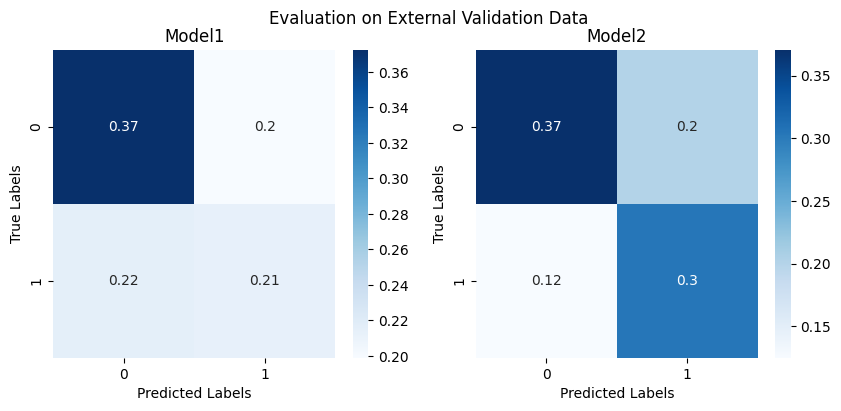

In [15]:
# Visualization of confusion matrices for external validation set results

# Extract true labels, predictions, and probabilities for both models
y_true_m1_external = results_model1_external.Label
y_pred_m1_external = results_model1_external.Prediction
y_prob_m1_external = results_model1_external.Probability

y_true_m2_external = results_model2_external.Label
y_pred_m2_external = results_model2_external.Prediction
y_prob_m2_external = results_model2_external.Probability

# Compute the confusion matrices
cm1 = confusion_matrix(y_true_m1_external, y_pred_m1_external, normalize='all')
cm2 = confusion_matrix(y_true_m2_external, y_pred_m2_external, normalize='all')

# Plot the confusion matrices
plt.figure(figsize=(10, 4))

plt.suptitle('Evaluation on External Validation Data')

plt.subplot(1,2,1)
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Model1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Model2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

## Performance Metrics Calculation

We calculate various performance metrics (Accuracy, TPR, TNR, PPV, F1, AUC) for both models on both datasets.

In [16]:
# Calculate performance metrics for test set
eval_test_data = pd.DataFrame(
    {('Model1','Test Data'):calculate_performance(y_true_m1_test, y_pred_m1_test, y_prob_m1_test),
     ('Model2','Test Data'):calculate_performance(y_true_m2_test, y_pred_m2_test, y_prob_m2_test)})

In [17]:
# Calculate performance metrics for external validation set
eval_external_data = pd.DataFrame(
    {('Model1','External Data'):calculate_performance(y_true_m1_external, y_pred_m1_external, y_prob_m1_external),
     ('Model2','External Data'):calculate_performance(y_true_m2_external, y_pred_m2_external, y_prob_m2_external)})

## Results Comparison

Finally, we combine the results from both datasets for easy comparison. The table below shows the performance metrics for both models on both the test and external validation datasets.

In [18]:
# Combine test and external validation results
combined_results = pd.concat([eval_test_data, eval_external_data], axis=1).sort_index(axis=1)

# Display the combined results
combined_results

Model1                  Model2          
         External Data Test Data External Data Test Data
Accuracy      0.585895  0.709534      0.674503  0.685144
TPR           0.497890  0.728155      0.708861  0.711297
TNR           0.651899  0.693878      0.648734  0.655660
PPV           0.517544  0.666667      0.602151  0.699588
F1            0.507527  0.696056      0.651163  0.705394
AUC           0.612829  0.802061      0.765890  0.758566

## Summary

This project provides hands-on experience in developing and evaluating a deep learning model for medical image classification. Key learning objectives include:

### 1. Fundamentals of Training a Deep Learning Model on Chest X-rays (CXRs)
- Image loading
- Hyperparameter tuning and optimization strategies
- Monitoring and interpreting training curves

### 2. Comprehensive Model Evaluation
- Assessing model performance on internal test data and external datasets
- Understanding and mitigating performance drops on external data
- Utilizing various evaluation metrics for thorough model assessment

### 3. Impact of Label Correlation on Model Generalizability
- Exploring the concept of shortcut learning in medical imaging AI
- Analyzing how correlations between labels can affect model performance and generalization

Through this project, participants will gain practical skills in:
- Implementing deep learning models for medical image analysis
- Understanding and addressing challenges specific to medical AI, such as dataset bias and shortcut learning